## Spotify Audion Features

* Acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: he overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style

In [2]:
df_playlist = pd.read_excel('playlist_fadel.xlsx', sheet_name='playlist_fadel', ignore_index=True)
df_playlist.shape

(529, 16)

In [3]:
df_playlist.reset_index(inplace=True, drop=True)
df_playlist.head()

,artist,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Tom Misch,Geography,2,1ibKz18OKGX816AzT1HAzy,Lost In Paris,spotify:track:1ibKz18OKGX816AzT1HAzy,0.364,0.788,0.711,0.000021,0.0838,-7.811,0.0597,104.149,0.802,38
1,Tom Misch,Geography,6,51Q2IPSmoFuDAkMmaYwjjF,It Run's Through Me,spotify:track:51Q2IPSmoFuDAkMmaYwjjF,0.205,0.802,0.607,0.000748,0.2460,-11.028,0.2890,96.916,0.274,39
2,Tom Misch,Geography,7,56rFCOMQzN4Av0ik0nqHVu,Isn’t She Lovely,spotify:track:56rFCOMQzN4Av0ik0nqHVu,0.992,0.505,0.481,0.855000,0.3780,-16.006,0.4350,178.601,0.640,25
3,Tom Misch,Geography,14,4NnbGCWJYwamcYQVujM2Yw,Follow,spotify:track:4NnbGCWJYwamcYQVujM2Yw,0.113,0.785,0.367,0.063300,0.0902,-8.483,0.0363,90.003,0.468,22
4,Tom Misch,Geography,15,7r56FaChmE9vA6BxMCuj37,Never Moved,spotify:track:7r56FaChmE9vA6BxMCuj37,0.410,0.702,0.394,0.891000,0.0825,-6.133,0.0465,92.958,0.672,22


## Mean values of the Audio Features

In [4]:
df_playlist.artist.value_counts()

John Mayer              166
Maliq & d'Essentials     79
Adhitia Sofyan           52
HONNE                    48
Efek Rumah Kaca          42
Mac Ayres                36
Charlie Burg             33
Tom Misch                30
Banda Neira              25
Barasuara                18
Name: artist, dtype: int64

In [32]:
df_features = df_playlist.loc[:, ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]

In [33]:
df_features.mean()

acousticness        0.399990
danceability        0.561098
energy              0.533561
instrumentalness    0.068716
liveness            0.280163
speechiness         0.061665
valence             0.427596
dtype: float64

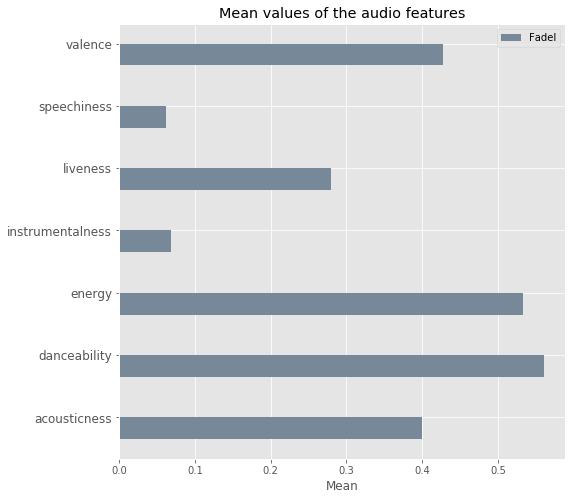

In [34]:
# Number of features
N = len(df_features.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, df_features.mean() , width, label='Fadel', color = 'lightslategray')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(df_features)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

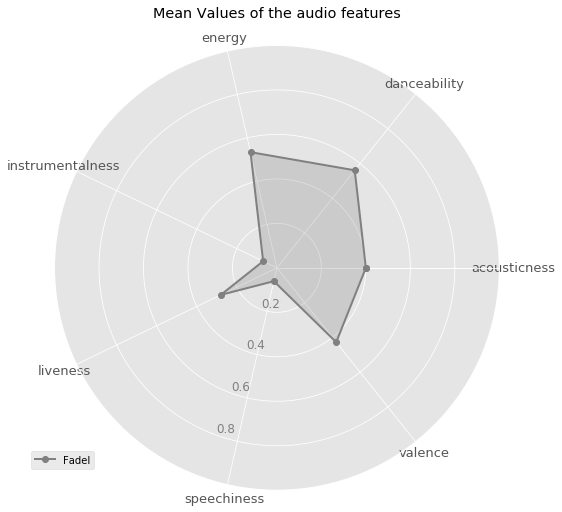

In [35]:

labels= list(df_features)[:]
stats= df_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Fadel", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

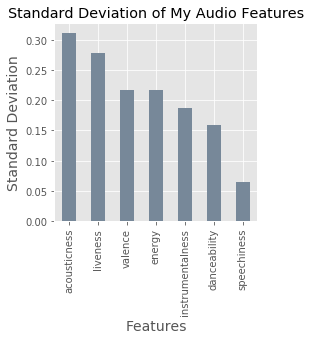

In [9]:
plt.subplot(221)

df_features.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of My Audio Features")

plt.rcParams['figure.figsize'] =(15,15)

In [10]:
np.poly1d(np.polyfit(df_features['valence'], df_features['energy'],1))

poly1d([0.49001271, 0.32403319])

### Valence and Energy

Text(0.5,1,'Valence x Energy')

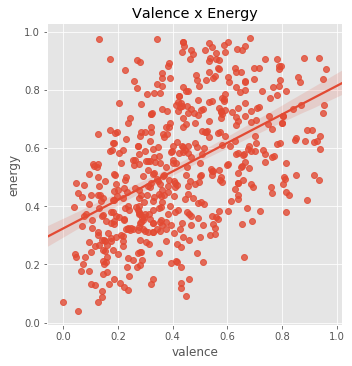

In [11]:
sns.lmplot('valence', 'energy', data=df_features)
plt.title('Valence x Energy')

### Valence and Danceablity

Text(0.5,1,'Valence x Danceability')

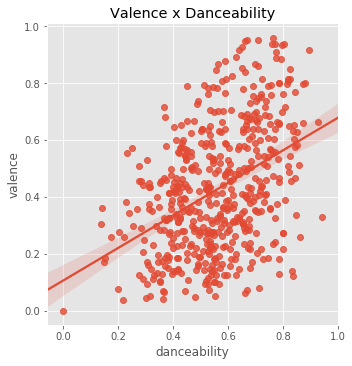

In [12]:
sns.lmplot('danceability', 'valence', data=df_features)
plt.title('Valence x Danceability')

In [39]:
df_playlist[['tempo']].mean()

tempo    114.935045
dtype: float64

Text(0.5,1,'Standard Deviation of audio features')

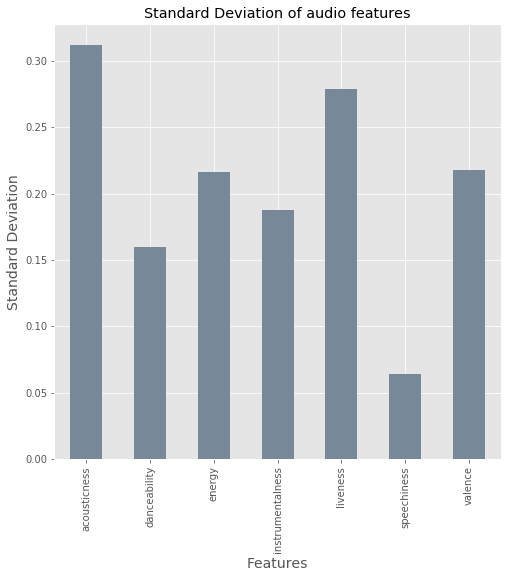

In [42]:
df_features.std().plot(kind = 'bar', color = 'lightslategray')
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of audio features")